## Reproduce Supp. Fig. 10a (top line) and Supp. Fig. 10e
Compute a multi-dimensional scaling of the raw sequences (Levenshtein distance) deep mutational scanning stability data from Rocklin (2017). Use the first principle coordinate to make the upper line (labelled sequence PC1) in Supp. Fig. 10a

In [1]:
import numpy as np
import Levenshtein
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.manifold import MDS
import pandas as pd
import sys
import random
import os
import Levenshtein
import fastcluster as fc
import scipy.cluster.hierarchy as hier
import pickle
# To allow imports from common directory
sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context, rep_names, save_for_pub, label_point
from common.embedding_tools import lev_dist_matrix, lev_sim_matrix

%matplotlib inline
random.seed(42)
np.random.seed(42)

In [2]:
wt_ssm2 = pd.read_csv("../../data/just_wt_ssm2_sequences.csv", index_col=0)
wt_ssm2

,name,sequence,my_wt,pos,mut,wt_aa,ec50_t,delta_ec50_t,ec50_95ci_lbound_t,ec50_95ci_ubound_t,...,ec50_95ci_ubound_c,ec50_95ci_c,ec50_pred_c,delta_pred_vs_wt_c,ec50_rise_c,stabilityscore_c,ec50_rise_c_adj,stabilityscore_c_adj,consensus_ec50_rise,consensus_stability_score
0,EEHEE_rd3_0037.pdb,TTIKVNGQEYTVPLSPEQAAKAAKKRWPDYEVQIHGNTVKVTR,EEHEE_rd3_0037.pdb,0,na,wt,4.67,0.0,4.7,4.7,...,3.3,0.0,0.51,0.0,2.83,0.85,2.83,0.85,2.83,0.85
775,EEHEE_rd3_1498.pdb,GTLHLNGVTVKVPSLEKAIKAAKKFAKKYNLEVQVHGNTVHVH,EEHEE_rd3_1498.pdb,0,na,wt,4.37,0.0,4.3,4.5,...,2.8,0.2,-1.25,0.0,3.92,1.18,3.92,1.18,3.66,1.10
1550,EEHEE_rd3_1702.pdb,TTIHVGDLTLKYDNPKKAYEIAKKLAKKYNLTVTIKNGKITVT,EEHEE_rd3_1702.pdb,0,na,wt,4.59,0.0,4.5,4.7,...,2.6,0.3,-0.82,0.0,3.27,0.98,3.27,0.98,3.71,1.12
2325,EEHEE_rd3_1716.pdb,TEVHLGDIKLKYPNPEQAKKAAEKLAQKYNLTWTVIGDYVKIE,EEHEE_rd3_1716.pdb,0,na,wt,4.95,0.0,4.9,5.0,...,3.7,0.0,-0.14,0.0,3.81,1.15,3.81,1.15,3.81,1.15
3100,EHEE_0882.pdb,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT,EHEE_0882.pdb,0,na,wt,4.59,0.0,4.5,4.6,...,3.6,0.1,-1.86,0.0,5.40,1.62,5.40,1.62,5.40,1.62
3821,EHEE_rd2_0005.pdb,GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVR,EHEE_rd2_0005.pdb,0,na,wt,4.68,0.0,4.7,4.7,...,3.9,0.1,-1.82,0.0,5.67,1.71,5.67,1.71,5.67,1.71
4542,EHEE_rd3_0015.pdb,GSSKTQYEYDTKEEAQKAYEKFKKQGIPVTITQKNGKWFVQVE,EHEE_rd3_0015.pdb,0,na,wt,4.70,0.0,4.7,4.7,...,3.8,0.0,-1.01,0.0,4.78,1.44,4.78,1.44,5.28,1.59
5263,HEEH_rd2_0779.pdb,TLDEARELVERAKKEGTGVDVNGQRFEDWREAERWVREQEKNK,HEEH_rd2_0779.pdb,0,na,wt,4.51,0.0,4.5,4.6,...,2.5,0.2,-0.90,0.0,3.30,0.99,3.30,0.99,3.62,1.09
6038,HEEH_rd3_0223.pdb,TIDEIIKALEQAVKDNKPIQVGNYTVTSADEAEKLAKKLKKEY,HEEH_rd3_0223.pdb,0,na,wt,4.59,0.0,4.5,4.6,...,3.5,0.1,-0.22,0.0,3.68,1.11,3.68,1.11,3.68,1.11
6813,HEEH_rd3_0726.pdb,TELKKKLEEALKKGEEVRVKFNGIEIRITSEDAARKAVELLEK,HEEH_rd3_0726.pdb,0,na,wt,4.62,0.0,4.6,4.7,...,3.0,0.2,0.48,0.0,2.39,0.72,2.39,0.72,2.61,0.79


In [3]:
wt_ssm2 = wt_ssm2.loc[:,["name", "sequence"]]
wt_ssm2

,name,sequence
0,EEHEE_rd3_0037.pdb,TTIKVNGQEYTVPLSPEQAAKAAKKRWPDYEVQIHGNTVKVTR
775,EEHEE_rd3_1498.pdb,GTLHLNGVTVKVPSLEKAIKAAKKFAKKYNLEVQVHGNTVHVH
1550,EEHEE_rd3_1702.pdb,TTIHVGDLTLKYDNPKKAYEIAKKLAKKYNLTVTIKNGKITVT
2325,EEHEE_rd3_1716.pdb,TEVHLGDIKLKYPNPEQAKKAAEKLAQKYNLTWTVIGDYVKIE
3100,EHEE_0882.pdb,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT
3821,EHEE_rd2_0005.pdb,GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVR
4542,EHEE_rd3_0015.pdb,GSSKTQYEYDTKEEAQKAYEKFKKQGIPVTITQKNGKWFVQVE
5263,HEEH_rd2_0779.pdb,TLDEARELVERAKKEGTGVDVNGQRFEDWREAERWVREQEKNK
6038,HEEH_rd3_0223.pdb,TIDEIIKALEQAVKDNKPIQVGNYTVTSADEAEKLAKKLKKEY
6813,HEEH_rd3_0726.pdb,TELKKKLEEALKKGEEVRVKFNGIEIRITSEDAARKAVELLEK


In [4]:
wt_ssm2 = wt_ssm2.reset_index()

In [5]:
lev_d = lev_dist_matrix(wt_ssm2.sequence.values)
lev_d

array([[  0.,  22.,  30.,  31.,  32.,  35.,  34.,  39.,  37.,  38.,  39.,
         36.,  38.,  36.,  41.,  41.,  40.],
       [ 22.,   0.,  26.,  25.,  31.,  34.,  33.,  38.,  40.,  40.,  38.,
         39.,  39.,  38.,  39.,  43.,  36.],
       [ 30.,  26.,   0.,  22.,  34.,  36.,  31.,  41.,  38.,  39.,  36.,
         37.,  41.,  38.,  42.,  40.,  36.],
       [ 31.,  25.,  22.,   0.,  37.,  36.,  33.,  39.,  36.,  36.,  36.,
         35.,  38.,  35.,  40.,  38.,  37.],
       [ 32.,  31.,  34.,  37.,   0.,  24.,  27.,  37.,  37.,  36.,  39.,
         34.,  36.,  35.,  38.,  42.,  36.],
       [ 35.,  34.,  36.,  36.,  24.,   0.,  26.,  38.,  40.,  39.,  39.,
         37.,  35.,  40.,  36.,  42.,  37.],
       [ 34.,  33.,  31.,  33.,  27.,  26.,   0.,  39.,  37.,  34.,  36.,
         39.,  39.,  38.,  40.,  38.,  35.],
       [ 39.,  38.,  41.,  39.,  37.,  38.,  39.,   0.,  32.,  31.,  35.,
         36.,  31.,  34.,  36.,  39.,  41.],
       [ 37.,  40.,  38.,  36.,  37.,  40.,  37.

In [6]:
mds = MDS(n_components=2, n_init=8, verbose=10, n_jobs=4, random_state=42, dissimilarity='precomputed')
mds.fit(lev_d)

it: 0, stress 172574.59609
it: 1, stress 26967.2475341
it: 0, stress 172968.574782
it: 2, stress 25285.6347926
it: 1, stress 28924.811892
it: 3, stress 24637.4890867
it: 2, stress 26775.351831
it: 4, stress 24303.5190332
it: 5, stress 24081.2028713
it: 3, stress 25251.8084645
it: 6, stress 23918.2769175
it: 7, stress 23792.7811505
it: 4, stress 24284.0494421
it: 8, stress 23686.8369729
it: 5, stress 23710.7597345
it: 9, stress 23584.3136972
it: 6, stress 23323.5135293
it: 7, stress 23004.5353111
it: 10, stress 23471.3011626
it: 8, stress 22689.2986747
it: 11, stress 23339.7267377
it: 9, stress 22335.4364057
it: 10, stress 21924.9309387
it: 12, stress 23193.8039295
it: 13, stress 23049.0163105
it: 14, stress 22918.7366169
it: 0, stress 173172.321964
it: 11, stress 21489.998427
it: 12, stress 21101.0411024
it: 0, stress 173372.207388
it: 1, stress 27845.0862777
it: 15, stress 22803.6802848
it: 2, stress 25617.8224421
it: 13, stress 20793.8702619
it: 1, stress 28511.5541298
it: 3, stress 

it: 61, stress 17138.887133
it: 78, stress 16626.1515191
it: 72, stress 17210.5538746
it: 74, stress 19188.644656
it: 79, stress 16609.2026096
it: 62, stress 17082.3609816
it: 73, stress 17192.790555
it: 75, stress 19161.7539981
it: 74, stress 17173.9000589
it: 63, stress 17023.7070462
it: 76, stress 19133.2974158
it: 80, stress 16592.7959769
it: 64, stress 16961.3739454
it: 77, stress 19103.2442502
it: 75, stress 17153.6501856
it: 81, stress 16576.4529799
it: 78, stress 19071.7327007
it: 65, stress 16895.7957182
it: 79, stress 19039.1122738
it: 76, stress 17131.8209846
it: 82, stress 16559.6956988
it: 80, stress 19005.9323672
it: 66, stress 16829.5774184
it: 83, stress 16542.0533314
it: 67, stress 16765.8688868
it: 84, stress 16523.0645646
it: 77, stress 17108.2228666
it: 85, stress 16502.2839955
it: 81, stress 18972.8568888
it: 68, stress 16706.4406906
it: 78, stress 17082.7199369
it: 82, stress 18940.5249555
it: 83, stress 18909.4180075
it: 86, stress 16479.3027922
it: 79, stress 17

it: 139, stress 16120.3096959
it: 149, stress 15969.2762901
it: 128, stress 16017.9285191
it: 140, stress 16111.1250307
it: 147, stress 17439.160222
it: 148, stress 17435.1747601
it: 150, stress 15966.9592037
it: 129, stress 16016.9727684
it: 149, stress 17430.9921219
it: 141, stress 16102.8143614
it: 151, stress 15964.6451765
it: 142, stress 16095.6261023
it: 150, stress 17426.6068874
it: 130, stress 16016.0737492
it: 152, stress 15962.3447563
it: 143, stress 16089.6685931
it: 131, stress 16015.2282338
it: 144, stress 16084.9118277
it: 153, stress 15960.0687237
it: 151, stress 17422.0150436
it: 145, stress 16081.2243137
it: 154, stress 15957.827821
it: 132, stress 16014.4331637
it: 152, stress 17417.213606
it: 155, stress 15955.6324843
it: 153, stress 17412.2001298
it: 133, stress 16013.6856409
it: 154, stress 17406.9721634
it: 156, stress 15953.4925927
it: 155, stress 17401.52673
it: 157, stress 15951.4172434
it: 156, stress 17395.8599349
it: 157, stress 17389.9668048
it: 158, stress

it: 65, stress 20451.4387942
it: 25, stress 23691.9395103
it: 49, stress 23634.1922103
it: 66, stress 20443.1534326
it: 26, stress 23605.3487893
it: 207, stress 17060.1469579
it: 67, stress 20435.3540767
it: 50, stress 23566.7138347
it: 68, stress 20427.9408667
it: 27, stress 23517.6112794
it: 208, stress 17055.6268407
it: 51, stress 23494.4376255
it: 69, stress 20420.8486372
it: 209, stress 17051.1391376
it: 28, stress 23430.5129689
it: 52, stress 23416.4029812
it: 29, stress 23346.0829683
it: 210, stress 17046.6671932
it: 211, stress 17042.1946095
it: 30, stress 23266.0188535
it: 53, stress 23331.5153817
it: 70, stress 20414.0339959
it: 31, stress 23191.2555307
it: 212, stress 17037.7058827
it: 54, stress 23238.3336301
it: 71, stress 20407.4668133
it: 72, stress 20401.124689
it: 32, stress 23121.8465661
it: 213, stress 17033.1871144
it: 55, stress 23135.3124265
it: 73, stress 20394.9894022
it: 33, stress 23057.1318411
it: 74, stress 20389.0446771
it: 34, stress 22996.0373089
it: 214,

it: 130, stress 19868.1197798
it: 125, stress 19751.6086242
it: 100, stress 19944.9782271
it: 271, stress 16869.7965681
it: 272, stress 16869.3485345
it: 131, stress 19853.9691327
it: 101, stress 19936.2259266
it: 273, stress 16868.9325009
it: 126, stress 19712.1983138
it: 132, stress 19839.7528318
it: 274, stress 16868.5462942
it: 102, stress 19927.0827457
it: 127, stress 19672.7973443
it: 133, stress 19825.2615701
it: 103, stress 19917.5182685
it: 275, stress 16868.1878729
it: 128, stress 19633.0121567
it: 134, stress 19810.1596858
it: 104, stress 19907.5077464
it: 129, stress 19592.5421105
it: 135, stress 19793.9207474
it: 136, stress 19775.7249202
it: 130, stress 19551.267358
it: 137, stress 19754.2984681
it: 131, stress 19509.3125127
it: 276, stress 16867.8553218
it: 105, stress 19897.0348122
it: 138, stress 19727.6765541
it: 132, stress 19467.0563296
it: 106, stress 19886.0942037
it: 133, stress 19425.0649153
it: 139, stress 19692.8991848
it: 107, stress 19874.6940501
it: 134, st

[Parallel(n_jobs=4)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   3 out of   8 | elapsed:    0.4s remaining:    0.6s


it: 281, stress 16866.5217347
it: 137, stress 19269.4055449
it: 112, stress 19812.0316508
it: 282, stress 16866.3105571
it: 113, stress 19798.7250562
it: 142, stress 19493.6591481
it: 138, stress 19233.8138105
it: 283, stress 16866.1149073
it: 114, stress 19785.2701502
it: 143, stress 19382.0547366
it: 115, stress 19771.6898753
it: 284, stress 16865.9336766
it: 144, stress 19250.9497514
it: 116, stress 19757.9914486
it: 145, stress 19111.6243666
it: 117, stress 19744.1699243
it: 118, stress 19730.2145489
it: 285, stress 16865.7658325
it: 119, stress 19716.1164518
it: 146, stress 18977.6305907
it: 286, stress 16865.6104136
it: 139, stress 19198.6668663
it: 120, stress 19701.8760238
it: 147, stress 18859.7156177
it: 140, stress 19163.3028451
it: 287, stress 16865.4665249
it: 148, stress 18763.6455967
it: 141, stress 19127.2341496
it: 121, stress 19687.5085644
it: 142, stress 19090.3791001
it: 149, stress 18690.4940418
it: 143, stress 19053.236357
it: 288, stress 16865.3333336
it: 150, st

it: 218, stress 17802.2078139
it: 193, stress 17589.7010812
it: 219, stress 17792.1827872
it: 68, stress 18005.8345539
it: 194, stress 17531.3892957
it: 220, stress 17783.3455654
it: 69, stress 17995.8993349
it: 221, stress 17775.5593496
it: 195, stress 17480.6598852
it: 70, stress 17986.0797924
it: 196, stress 17437.5462664
it: 222, stress 17768.6848833
it: 197, stress 17401.1140019
it: 71, stress 17976.364626
it: 223, stress 17762.5903116
it: 72, stress 17966.737642
it: 224, stress 17757.15549
it: 73, stress 17957.1765728
it: 225, stress 17752.2728627
it: 74, stress 17947.6530569
it: 226, stress 17747.8466166
it: 227, stress 17743.7912083
it: 75, stress 17938.1334034
it: 228, stress 17740.0298416
it: 76, stress 17928.5797763
it: 229, stress 17736.4931434
it: 77, stress 17918.9515017
it: 230, stress 17733.1181002
it: 78, stress 17909.2062781
it: 231, stress 17729.8472448
it: 79, stress 17899.3011617
it: 232, stress 17726.628057
it: 80, stress 17889.1932708
it: 233, stress 17723.412542

[Parallel(n_jobs=4)]: Done   4 out of   8 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   5 out of   8 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   6 out of   8 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.8s finished


MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=8, n_jobs=4, random_state=42, verbose=10)

In [7]:
print(mds.embedding_.shape)
mds.embedding_

(17, 2)


array([[ 23.29429051,  11.64120482],
       [ 25.18836699,   1.95542926],
       [ 24.28966886,  -6.48094544],
       [ 13.71105337,   3.6847424 ],
       [ 14.51164248, -14.51710314],
       [ 12.22443668, -23.42242492],
       [  4.45336435, -15.36592493],
       [-20.52246065,  18.90268538],
       [-13.07292023,   9.80477841],
       [-23.51764828,   4.16305967],
       [-13.24309402,  -1.53057003],
       [  8.77136673,  23.63832937],
       [ -6.49355785,  23.55320089],
       [  1.84133024,  23.17321097],
       [-18.3347759 , -19.80197755],
       [-28.20722071, -12.32756801],
       [ -4.89384258, -27.07012716]])

In [8]:
components = mds.embedding_


In [9]:
# Compute the string median and also vidualize this
median_seq = Levenshtein.median(wt_ssm2['sequence'].values.tolist())
median_seq

'TGSEIELKDEELAKEEAGKEKAKEKAGKKR'

In [10]:
# Try to make this an even better median
median_improved = Levenshtein.median_improve(median_seq, wt_ssm2['sequence'].values.tolist())
median_improved

'TEDEVKAEEAAKKAGNETVTQERKAVKVR'

In [11]:
# How many times does this work?
median_improved2 = Levenshtein.median_improve(median_improved, wt_ssm2['sequence'].values.tolist())
median_improved2

'TELDEEKAGEAAKEKAGYNITVTQERKAVKVR'

In [12]:
# I'm not sure what's going on here, let me just iterate on this for a while
working_median = median_improved2
for i in range(1000):
    if i % 100 == 0:
        print(f"Iter {i} has working_median {working_median}")
    working_median = Levenshtein.median_improve(working_median, wt_ssm2['sequence'].values.tolist())

Iter 0 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR
Iter 100 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR
Iter 200 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR
Iter 300 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR
Iter 400 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR
Iter 500 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR
Iter 600 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR
Iter 700 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR
Iter 800 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR
Iter 900 has working_median TELDEEKAGEAAKEKAGYNITVTQERKAVKVR


In [13]:
# cool, looks like thats a real median. Lets recompute lev distance
# including that point.
new_sequences = np.array(
    wt_ssm2.sequence.values.tolist() + [working_median]
)
print(new_sequences)


['TTIKVNGQEYTVPLSPEQAAKAAKKRWPDYEVQIHGNTVKVTR'
 'GTLHLNGVTVKVPSLEKAIKAAKKFAKKYNLEVQVHGNTVHVH'
 'TTIHVGDLTLKYDNPKKAYEIAKKLAKKYNLTVTIKNGKITVT'
 'TEVHLGDIKLKYPNPEQAKKAAEKLAQKYNLTWTVIGDYVKIE'
 'GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT'
 'GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVR'
 'GSSKTQYEYDTKEEAQKAYEKFKKQGIPVTITQKNGKWFVQVE'
 'TLDEARELVERAKKEGTGVDVNGQRFEDWREAERWVREQEKNK'
 'TIDEIIKALEQAVKDNKPIQVGNYTVTSADEAEKLAKKLKKEY'
 'TELKKKLEEALKKGEEVRVKFNGIEIRITSEDAARKAVELLEK'
 'TWQDLVKIAEKALEKGEPITINGITVTTKEQAKQAIEYLKKAY'
 'RKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL'
 'SKDEAQREAERAIRSGNKEEARRILEEAGYSPEQAERIIRKLG'
 'ERRKIEEIAKKLYQSGNPEAARRFLRKAGISEEEIERILQKAG'
 'GMADEEKLPPGWEKRMSRSSGRVYYFNHITNASQWERPSGGSS'
 'FEIPDDVPLPAGWEMAKTSSGQRYFKNHIDQTTTWQDPRKAMLSQM'
 'GSSGSLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLFGSS'
 'TELDEEKAGEAAKEKAGYNITVTQERKAVKVR']


In [14]:
lev_d = lev_dist_matrix(new_sequences)
lev_d

array([[  0.,  22.,  30.,  31.,  32.,  35.,  34.,  39.,  37.,  38.,  39.,
         36.,  38.,  36.,  41.,  41.,  40.,  30.],
       [ 22.,   0.,  26.,  25.,  31.,  34.,  33.,  38.,  40.,  40.,  38.,
         39.,  39.,  38.,  39.,  43.,  36.,  29.],
       [ 30.,  26.,   0.,  22.,  34.,  36.,  31.,  41.,  38.,  39.,  36.,
         37.,  41.,  38.,  42.,  40.,  36.,  28.],
       [ 31.,  25.,  22.,   0.,  37.,  36.,  33.,  39.,  36.,  36.,  36.,
         35.,  38.,  35.,  40.,  38.,  37.,  26.],
       [ 32.,  31.,  34.,  37.,   0.,  24.,  27.,  37.,  37.,  36.,  39.,
         34.,  36.,  35.,  38.,  42.,  36.,  27.],
       [ 35.,  34.,  36.,  36.,  24.,   0.,  26.,  38.,  40.,  39.,  39.,
         37.,  35.,  40.,  36.,  42.,  37.,  25.],
       [ 34.,  33.,  31.,  33.,  27.,  26.,   0.,  39.,  37.,  34.,  36.,
         39.,  39.,  38.,  40.,  38.,  35.,  27.],
       [ 39.,  38.,  41.,  39.,  37.,  38.,  39.,   0.,  32.,  31.,  35.,
         36.,  31.,  34.,  36.,  39.,  41.,  29.],


In [15]:
mds = MDS(n_components=2, n_init=8, n_jobs=4, random_state=42, dissimilarity='precomputed')
mds.fit(lev_d)


MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=8, n_jobs=4, random_state=42, verbose=0)

In [16]:
components = mds.embedding_

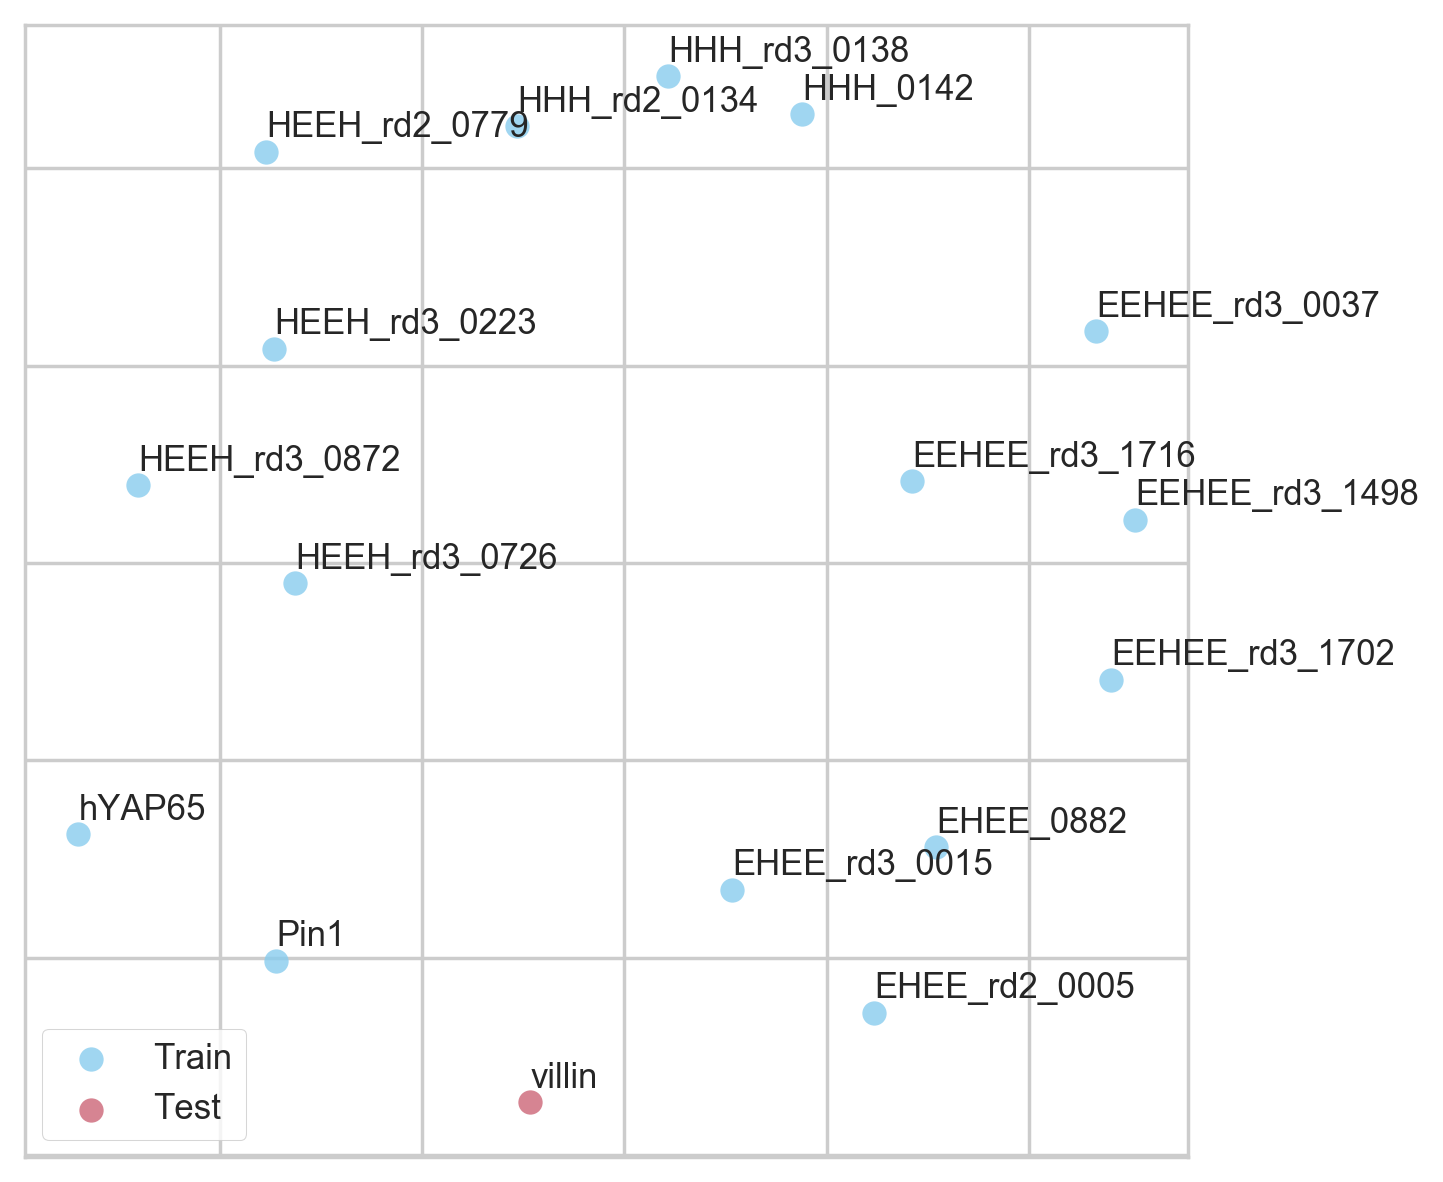

In [17]:
# now plot again but color these
set_pub_plot_context(context="notebook")
name_of_test = ['villin']
name_of_train = wt_ssm2[~wt_ssm2['name'].isin(name_of_test)]['name']
test_idxs = wt_ssm2[wt_ssm2['name'].isin(name_of_test)].index.values
train_idxs = wt_ssm2[~wt_ssm2['name'].isin(name_of_test)].index.values
fig = plt.figure(figsize=(6,6), dpi=250)
ax = fig.add_subplot(111)
x = components[train_idxs,0]
y = components[train_idxs,1]
color = mpl.colors.rgb2hex(sns.color_palette()[0])
sns.regplot(x=x, y=y, fit_reg=False, ax=ax, color=color, label="Train")
label_point(pd.Series(x),pd.Series(y+.75),
            pd.Series(np.array(name_of_train)).map(lambda x: x.split(".")[0])
            ,ax, fontsize=10)

x = components[test_idxs,0]
y = components[test_idxs,1]
color = mpl.colors.rgb2hex(sns.color_palette()[1])
sns.regplot(x=x, y=y, fit_reg=False, ax=ax, color=color, label="Test")
label_point(pd.Series(x),pd.Series(y+.75),
            pd.Series(np.array(name_of_test)).map(lambda x: x.split(".")[0])
            ,ax, fontsize=10)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.legend(loc="lower left",fancybox=True, frameon=True)
save_for_pub(fig, path="./img/supp_fig10e", dpi=250)

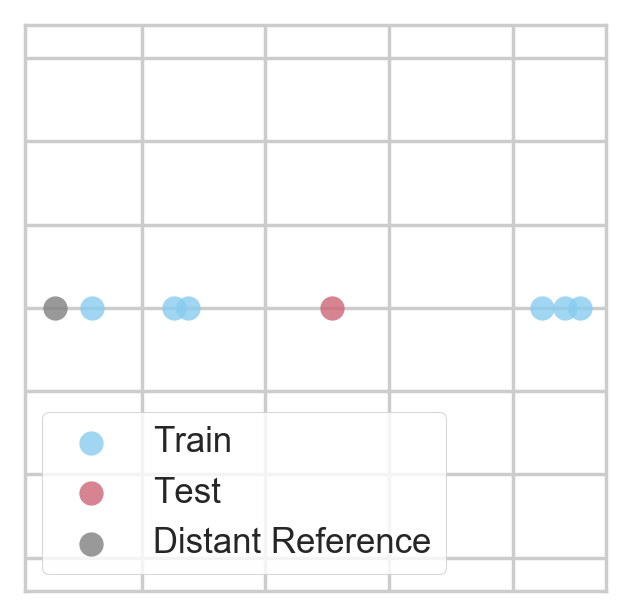

In [18]:
# now plot again but color these
y_bump = -.001
set_pub_plot_context(context="notebook")
name_of_reference = ['hYAP65']
name_of_test = ['villin']
name_of_train = ['HEEH_rd3_0872.pdb','HEEH_rd3_0223.pdb','HEEH_rd3_0726.pdb',
                 'EEHEE_rd3_1716.pdb',
                 "EHEE_rd2_0005.pdb", "EHEE_0882.pdb"]
test_idxs = wt_ssm2[wt_ssm2['name'].isin(name_of_test)].index.values
train_idxs = wt_ssm2[wt_ssm2['name'].isin(name_of_train)].index.values
ref_idxs = wt_ssm2[wt_ssm2['name'].isin(name_of_reference)].index.values
fig = plt.figure(figsize=(3,3), dpi=250)
ax = fig.add_subplot(111)
x = components[train_idxs,0].tolist()

y = np.zeros(len(train_idxs)).tolist()

color = mpl.colors.rgb2hex(sns.color_palette()[0])
sns.regplot(x=np.array(x), y=np.array(y), fit_reg=False, ax=ax, color=color, label="Train")


x = components[test_idxs,0].tolist()
y = np.zeros(len(test_idxs)).tolist()
color = mpl.colors.rgb2hex(sns.color_palette()[1])
sns.regplot(x=np.array(x), y=np.array(y), fit_reg=False, ax=ax, color=color, label="Test")

x = components[ref_idxs,0].tolist()
y = np.zeros(len(ref_idxs)).tolist()
color = 'grey'
sns.regplot(x=np.array(x), y=np.array(y), fit_reg=False, ax=ax, color=color, label="Distant Reference")
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.legend(loc="lower left",fancybox=True, frameon=True)
save_for_pub(fig, path="./img/supp_fig10a_top", dpi=250)